<a href="https://colab.research.google.com/github/handetushar/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [152]:
#Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import *
import warnings
warnings.filterwarnings("ignore")

In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
#Loading dataset
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Projects/Supervised ML/SeoulBikeData.csv', encoding= 'unicode_escape')

In [155]:
#Display first five row
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [156]:
df.shape

(8760, 14)

In [157]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [159]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


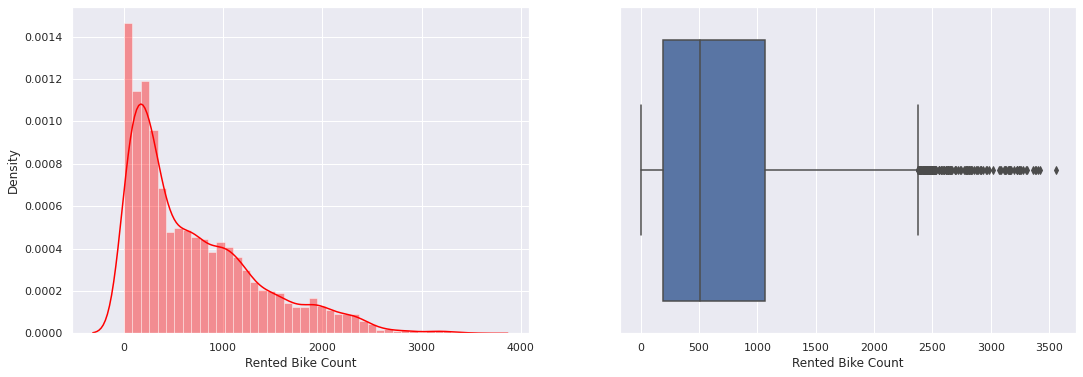

In [160]:
#Lets look at dependent feature
sns.set(rc={"figure.figsize": (18, 6)})
subplot(1,2,1)
sns.distplot(df['Rented Bike Count'], color='red')

subplot(1,2,2)
sns.boxplot(df['Rented Bike Count'])

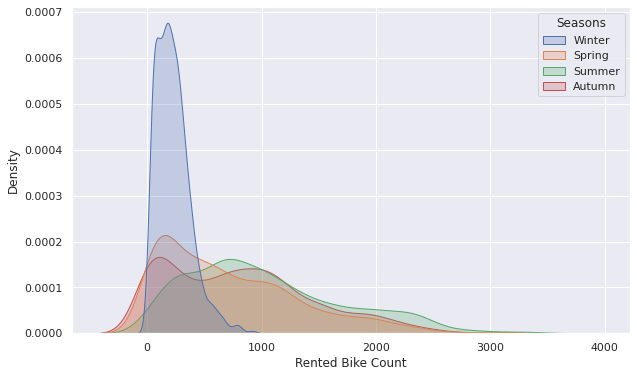

In [161]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Rented Bike Count', hue='Seasons', fill='True')

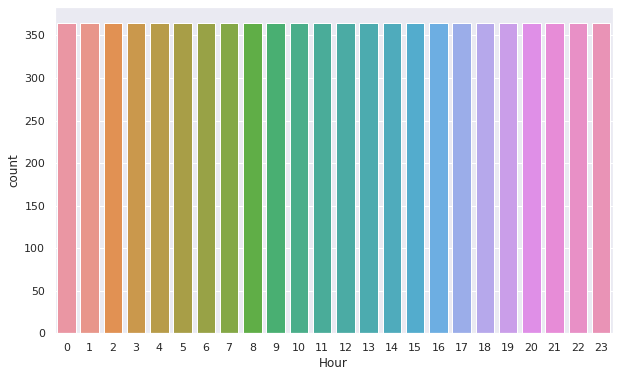

In [162]:
plt.figure(figsize=(10, 6))
sns.countplot(df['Hour'])

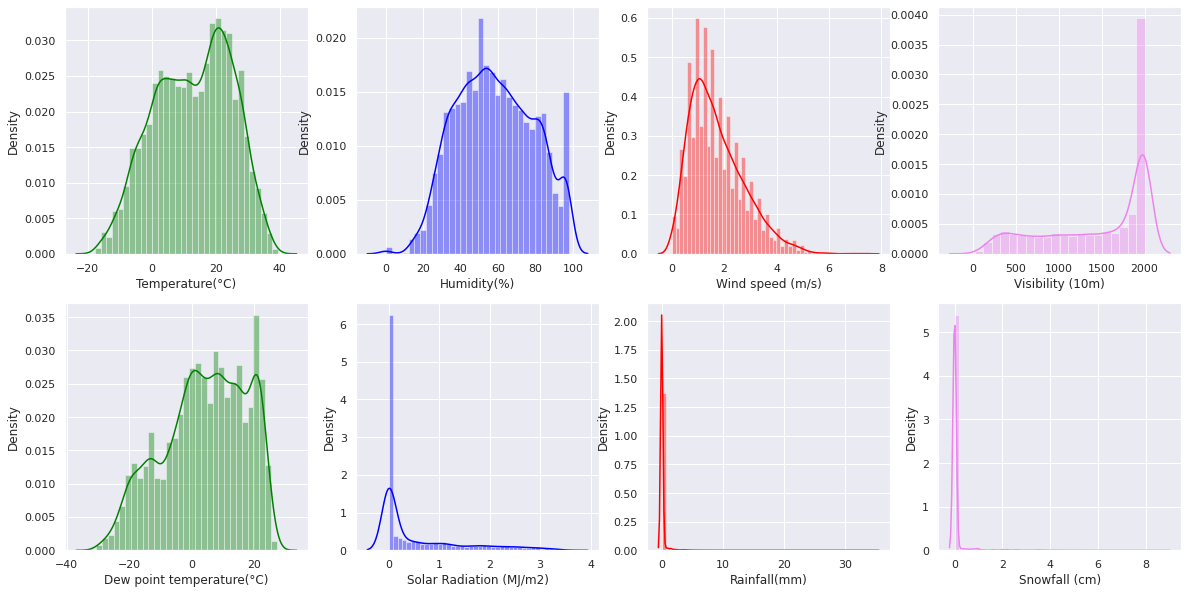

In [163]:
# display distribution of the independent features
sns.set(rc={"figure.figsize": (20, 10)})
subplot(2,4,1)
sns.distplot(df['Temperature(°C)'], color='green' )
subplot(2,4,2)
sns.distplot(df['Humidity(%)'], color='blue')
subplot(2,4,3)
sns.distplot(df['Wind speed (m/s)'], color='red')
subplot(2,4,4)
sns.distplot(df['Visibility (10m)'], color='violet')
subplot(2,4,5)
sns.distplot(df['Dew point temperature(°C)'], color='green' )
subplot(2,4,6)
sns.distplot(df['Solar Radiation (MJ/m2)'], color='blue')
subplot(2,4,7)
sns.distplot(df['Rainfall(mm)'], color='red')
subplot(2,4,8)
sns.distplot(df['Snowfall (cm)'], color='violet')

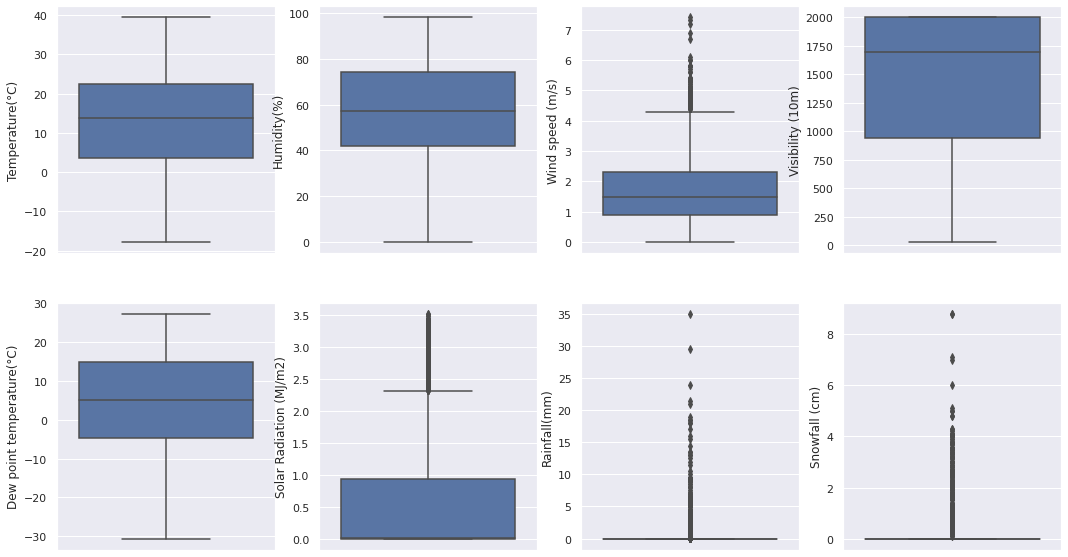

In [164]:
sns.set(rc={"figure.figsize": (18, 10)})
subplot(2,4,1)
sns.boxplot(y=df['Temperature(°C)'])
subplot(2,4,2)
sns.boxplot(y=df['Humidity(%)'])
subplot(2,4,3)
sns.boxplot(y=df['Wind speed (m/s)'])
subplot(2,4,4)
sns.boxplot(y=df['Visibility (10m)'])
subplot(2,4,5)
sns.boxplot(y=df['Dew point temperature(°C)'] )
subplot(2,4,6)
sns.boxplot(y=df['Solar Radiation (MJ/m2)'])
subplot(2,4,7)
sns.boxplot(y=df['Rainfall(mm)'])
subplot(2,4,8)
sns.boxplot(y=df['Snowfall (cm)'])

In [165]:
import datetime
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day

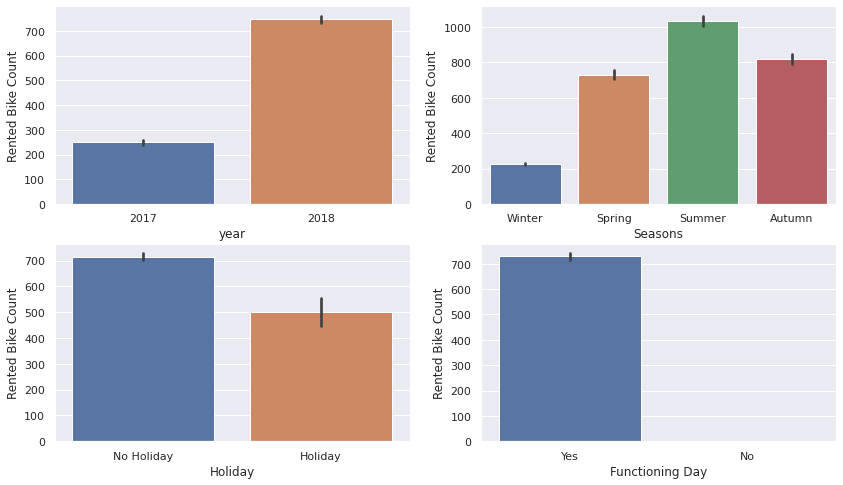

In [166]:
sns.set(rc={"figure.figsize": (14, 8)})
subplot(2,2,1)
sns.barplot(df['year'], y=df['Rented Bike Count'])
subplot(2,2,2)
sns.barplot(x=df['Seasons'],y=df['Rented Bike Count'])
subplot(2,2,3)
sns.barplot(x=df['Holiday'],y=df['Rented Bike Count'])
subplot(2,2,4)
sns.barplot(x=df['Functioning Day'],y=df['Rented Bike Count'])

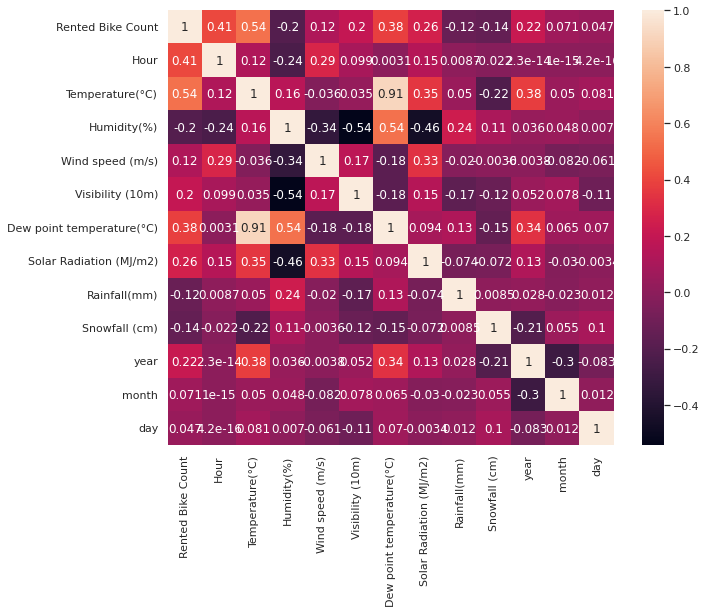

In [167]:
#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

In [168]:
#Handaling catagorical fatures
seasons_df=pd.get_dummies(df['Seasons'], prefix='seas', prefix_sep='_', drop_first='True')
holiday_df=pd.get_dummies(df['Holiday'], drop_first='True')
funday_df=pd.get_dummies(df['Functioning Day'], prefix='fun_day', drop_first='True')

In [169]:
new_df=pd.concat([df,seasons_df, holiday_df, funday_df], axis=1)

In [170]:
new_df.drop(['Date', 'Seasons', 'Holiday','Functioning Day'],axis=1, inplace=True)

In [171]:
new_df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'year',
       'month', 'day', 'seas_Spring', 'seas_Summer', 'seas_Winter',
       'No Holiday', 'fun_day_Yes'],
      dtype='object')

In [175]:
new_df=new_df.rename(columns={'Rented Bike Count':'bike_count','Hour':'hours','Temperature(°C)':'temp', 'Humidity(%)':'humidity','Dew point temperature(°C)':'dev_pt_temp',
                              'Wind speed (m/s)':'wind_speed', 'Visibility (10m)':'visibility','Solar Radiation (MJ/m2)':'solar_rad', 'Rainfall(mm)':'rainfall',
                              'Snowfall (cm)':'snowfall','No Holiday':'working_day','fun_day_Yes':'functioning_day' })

In [176]:
new_df.head()

,bike_count,hours,temp,humidity,wind_speed,visibility,dev_pt_temp,solar_rad,rainfall,snowfall,year,month,day,seas_Spring,seas_Summer,seas_Winter,working_day,functioning_day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,2017,1,12,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2017,1,12,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2017,1,12,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,2017,1,12,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,2017,1,12,0,0,1,1,1


In [183]:
new_df.shape

(8760, 18)

In [178]:
X=new_df.drop('bike_count', axis=1)
y=new_df['bike_count']

##Modeling

In [174]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [181]:
#train_test_split
X_train,X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=0)

In [182]:
print(X_train.shape, X_test.shape )

(7008, 17) (1752, 17)
